In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from scipy import ndimage
from skimage.color import rgb2gray

<function matplotlib.pyplot.show(close=None, block=None)>

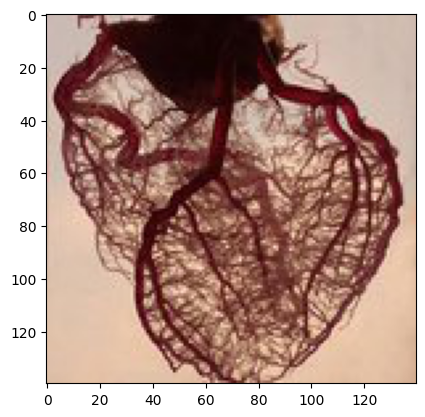

In [ ]:
img = io.imread("/content/drive/MyDrive/Colab Notebooks/Images/dip22.jpg")
plt.imshow(img)
plt.show

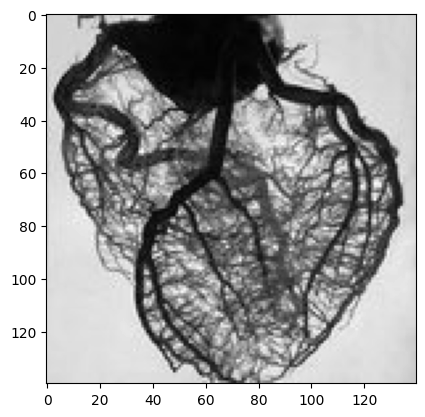

In [ ]:
gray_img = rgb2gray(img)
plt.imshow(gray_img, cmap = plt.get_cmap('gray'))
plt.show()

In [ ]:
from scipy import signal

def gkern(kernlen=21, std=3):
    gkern1d = signal.gaussian(kernlen, std=std).reshape(kernlen, 1)
    gkern2d = np.outer(gkern1d, gkern1d)
    return gkern2d

In [ ]:
gkern(3,3)

array([[0.89483932, 0.94595947, 0.89483932],
       [0.94595947, 1.        , 0.94595947],
       [0.89483932, 0.94595947, 0.89483932]])

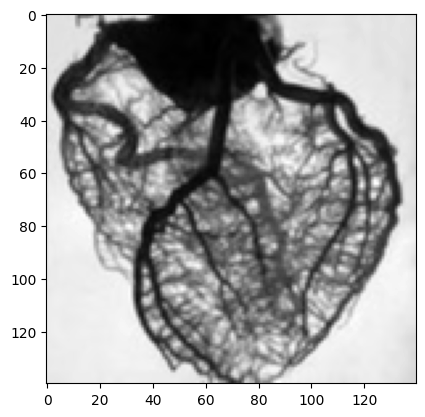

In [ ]:
guassian_img=ndimage.convolve (gray_img, gkern (2,2))
plt.imshow(guassian_img, cmap = plt.get_cmap('gray'))
plt.show()

In [ ]:
dx = np.array([[-1,0,1],
             [-1,0,1],
             [-1,0,1]])
dy = np.array([[-1,-1,-1],
                 [0,0,0],
                 [1,1,1]])

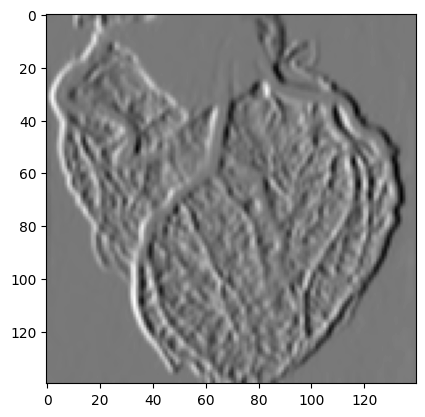

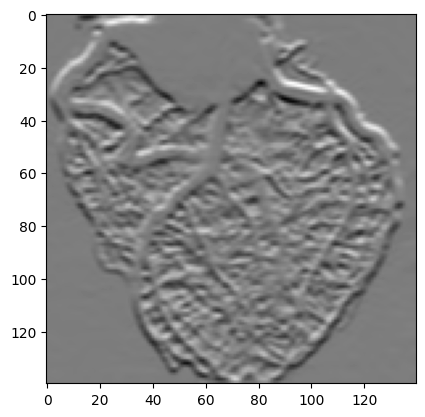

In [ ]:
dx_img = ndimage.convolve (guassian_img, dx)
dy_img = ndimage.convolve (guassian_img, dy)
plt.imshow(dx_img, cmap = plt.get_cmap('gray'))
plt.show()
plt.imshow(dy_img, cmap = plt.get_cmap('gray'))
plt.show()

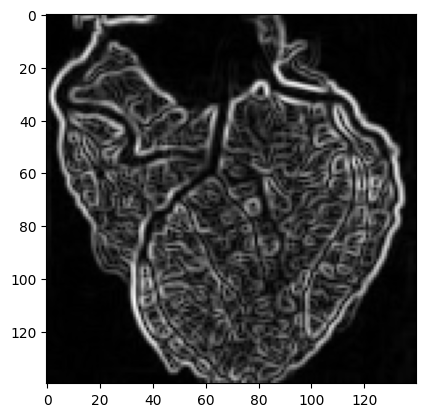

In [ ]:
res_img= np.hypot (dx_img, dy_img)
plt.imshow(res_img, cmap = plt.get_cmap('gray'))
plt.show()

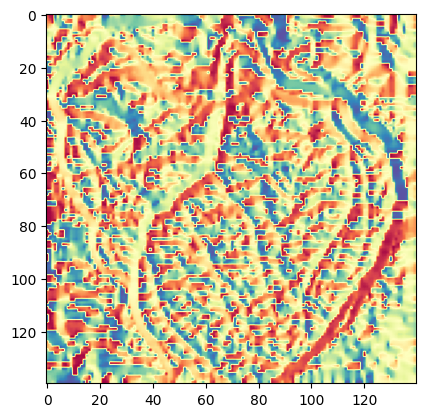

In [ ]:
gradient = np. degrees(np.arctan2(dy_img,dx_img))
plt.imshow(gradient, cmap = plt.get_cmap('Spectral'))
plt.show()

In [ ]:
def applyThreshold (res_img, threshold=0.3):
    final_img = np.zeros(res_img.shape)
    for x in range(0, res_img.shape[0]):
        for y in range(0, res_img.shape[0]):
            if res_img[x,y]>threshold:
                final_img[x,y]=1
    return final_img
def Normalize(img):
    img = img/np.max(img)
    return img

mean_mask= np.ones((3,3))
sobel_mask= mean_mask
sobel_mask[:,1]=2
sobel_mask

array([[1., 2., 1.],
       [1., 2., 1.],
       [1., 2., 1.]])

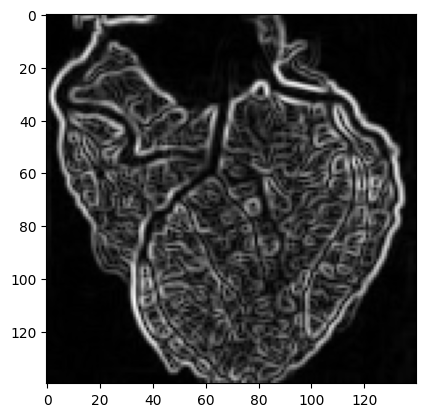

In [ ]:
res_img = Normalize(res_img)
plt.imshow(res_img, cmap = plt.get_cmap('gray'))
plt.show()

In [ ]:
res_img

array([[0.00307338, 0.00877075, 0.01053285, ..., 0.01196732, 0.0080892 ,
        0.00351373],
       [0.00490999, 0.00806503, 0.00946176, ..., 0.01277567, 0.00733687,
        0.00518795],
       [0.00714508, 0.00645318, 0.00618735, ..., 0.01374401, 0.00600426,
        0.00253378],
       ...,
       [0.00653591, 0.00702745, 0.00753692, ..., 0.02753497, 0.01751373,
        0.0050019 ],
       [0.00555569, 0.00506757, 0.00561384, ..., 0.02343745, 0.01490662,
        0.00393981],
       [0.00253378, 0.00204884, 0.00246829, ..., 0.01990912, 0.01329205,
        0.00341143]])

In [ ]:
def NonMaxSup (Gmag, Grad):
    NMS = np.zeros(Gmag.shape)
    for i in range(1, int (Gmag.shape[0]) - 1):
        for j in range(1, int (Gmag.shape[1]) - 1):
            if((Grad[i, j] >= -22.5 and Grad[i, j] <= 22.5) or (Grad [i, j] <= -157.5 and Grad[i, j] >= 157.5)):
                if((Gmag[i, j], Gmag[i, j+1]) and (Gmag[i, j] > Gmag[i,j-1])):
                    NMS[i, j] = Gmag[i, j]
                else:
                    NMS[i, j] = 0
            if((Grad[i, j] >= 22.5 and Grad[i, j] <= 67.5) or (Grad [i, j] <= -112.5 and Grad[i, j] >= -157.5)):
                if((Gmag[i, j] > Gmag[i+1,j+1]) and (Gmag[i, j] > Gmag[i-1,j-1])):
                    NMS[i, j] = Gmag[i,j]
                else:
                    NMS[i, j] = 0
            if((Grad[i, j] >= 67.5 and Grad[i, j] <= 112.5) or (Grad [i, j] <= -67.5 and Grad[i, j] >= -112.5)):
                if((Gmag[i, j], Gmag[i+1,j]) and (Gmag[i, j] > Gmag[i-1,j])):
                    NMS[i, j] = Gmag[i, j]
                else:
                    NMS[i, j] = 0
            if((Grad[i, j] >= 112.5 and Grad[i, j] <= 157.5) or (Grad[i, j] <= -22.5 and Grad[i,j] >= -67.5)):
                if((Gmag[i, j] > Gmag[i+1,j-1]) and (Gmag[i, j] > Gmag[i-1,j+1])):
                    NMS[i, j] = Gmag[i, j]
                else:
                    NMS[i, j] = 0
    return NMS




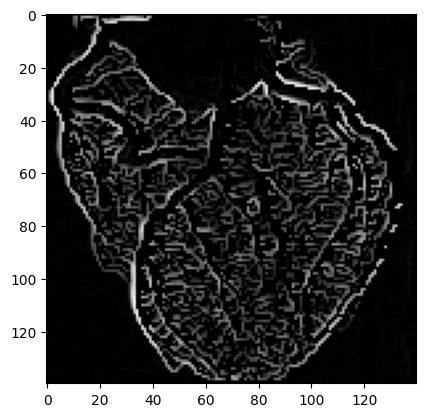

In [ ]:
img_nms = NonMaxSup (res_img, gradient)
plt.imshow(img_nms, cmap = plt.get_cmap('gray'))
plt.show()

In [ ]:
img_nms

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00806503, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00645318, 0.        , ..., 0.01374401, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.02753497, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02343745, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
def threshold(img, lowThresholdRatio=0.28, highThresholdRatio=0.32):
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;

    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)

    weak = np.int32(25)
    strong = np.int32(255)

    strong_i, strong_j = np.where(img>= highThreshold)
    zeros_i, zeros_j = np. where (img < lowThreshold)

    weak_i, weak_j = np.where((img <= highThreshold) & (img>= lowThreshold))

    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak

    return (res, weak, strong)

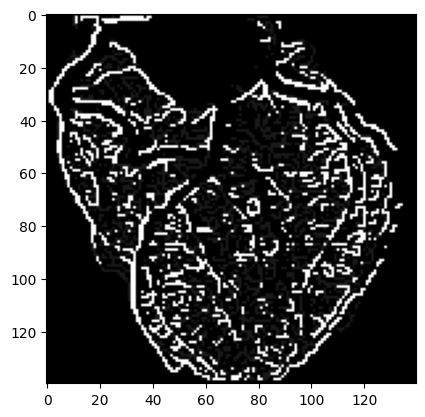

In [ ]:
canny_thresh, weak, strong = threshold (img_nms)
plt.imshow(canny_thresh, cmap = plt.get_cmap('gray'))
plt.show()

In [ ]:
canny_thresh

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [ ]:
def hysteresis (img, weak, strong=255):
    M, N = img.shape
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i, j] == weak):
                if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong) or (img[i, j-1] == strong) or (img[i, j+1] == strong) or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                    img[i, j] = strong
                else:
                    img[i, j] = 0

    return img

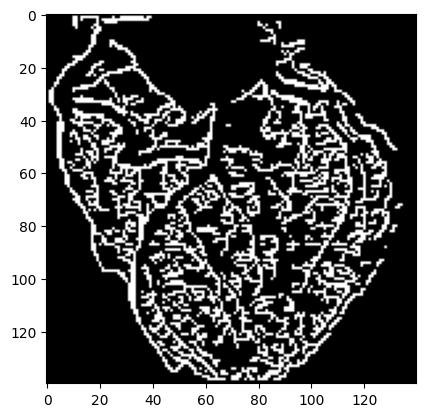

In [ ]:
canny_final =  hysteresis(canny_thresh, weak, strong)
plt.imshow(canny_final, cmap = plt.get_cmap('gray'))
plt.show()

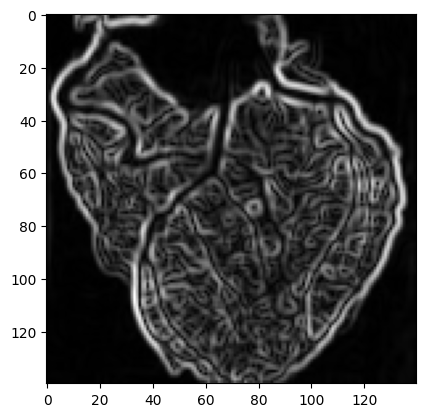

In [ ]:
#prewitt edge detector
prewitt_img= ndimage.convolve(gray_img,mean_mask)
prewitt_dx= ndimage.convolve(prewitt_img,dx)
prewitt_dy= ndimage.convolve(prewitt_img,dy)
prewitt_res=np.hypot(prewitt_dx,prewitt_dy)
plt.imshow(prewitt_res,cmap=plt.get_cmap('gray'))
plt.show()


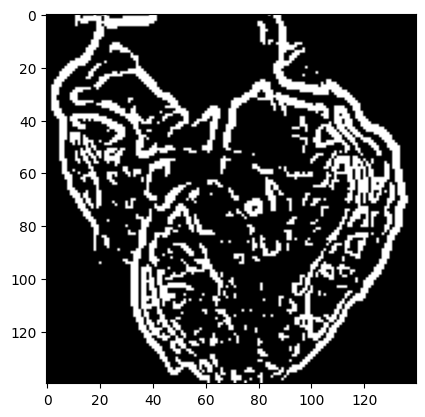

In [ ]:
prewitt_res= Normalize(prewitt_res)
prewitt_final=applyThreshold(prewitt_res)
plt.imshow(prewitt_final,cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
np.unique(prewitt_res)

array([1.76465355e-16, 9.46997215e-05, 1.25336298e-04, ...,
       9.91681938e-01, 9.93757869e-01, 1.00000000e+00])

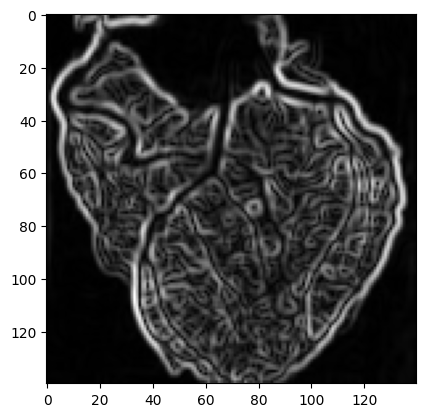

In [ ]:
#sobel edge detector
sobel_img=ndimage.convolve(gray_img,sobel_mask)
sobel_dx=ndimage.convolve(sobel_img,dx)
sobel_dy= ndimage.convolve(sobel_img,dy)
sobel_res=np.hypot(sobel_dx,sobel_dy)
plt.imshow(sobel_res,cmap=plt.get_cmap('gray'))
plt.show()

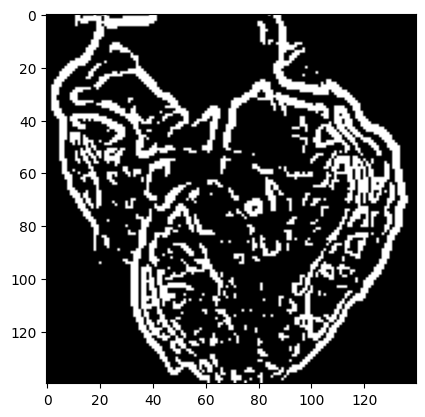

In [ ]:
sobel_res=Normalize(sobel_res)
sobel_final=applyThreshold(sobel_res)
plt.imshow(sobel_final,cmap=plt.get_cmap('gray'))
plt.show()

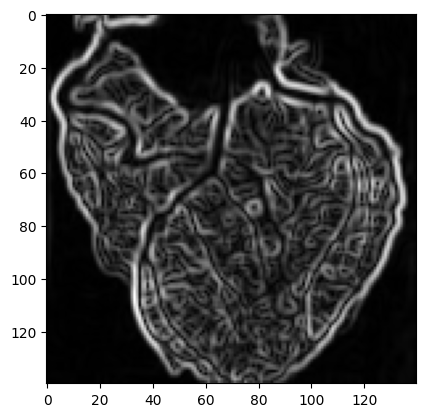

In [ ]:
roberts_img=ndimage.convolve(gray_img,sobel_mask)
sobel_dx=ndimage.convolve(sobel_img,dx)
sobel_dy= ndimage.convolve(sobel_img,dy)
sobel_res=np.hypot(sobel_dx,sobel_dy)
plt.imshow(sobel_res,cmap=plt.get_cmap('gray'))
plt.show()

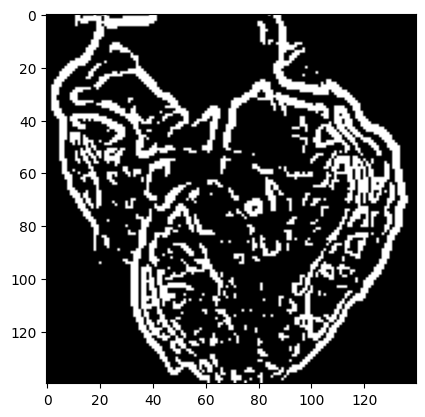

In [ ]:
sobel_res=Normalize(sobel_res)
sobel_final=applyThreshold(sobel_res)
plt.imshow(sobel_final,cmap=plt.get_cmap('gray'))
plt.show()